In [9]:
import scipy.sparse as sp
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [10]:
# Load the processed data
combined_sparse = sp.load_npz('project_4/data/combined_sparse.npz')
df_targets = pd.read_csv('project_4/data/df_targets.csv')
df_targets['PRIM_CONTRIBUTORY_CAUSE'] = pd.Categorical(df_targets['PRIM_CONTRIBUTORY_CAUSE'])

# Encode the target variable
label_encoder = LabelEncoder()
df_targets_encoded = pd.DataFrame()
df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'] = label_encoder.fit_transform(df_targets['PRIM_CONTRIBUTORY_CAUSE'].cat.codes)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    combined_sparse,
    df_targets_encoded['PRIM_CONTRIBUTORY_CAUSE_LABEL'].values,
    test_size=0.2,
    random_state=42
)

# Convert the sparse matrix to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': len(label_encoder.classes_)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=10)

# Evaluate the model
predictions = model.predict(dtest)
accuracy = (predictions == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.8229267715603927


NameError: name 'xgb' is not defined

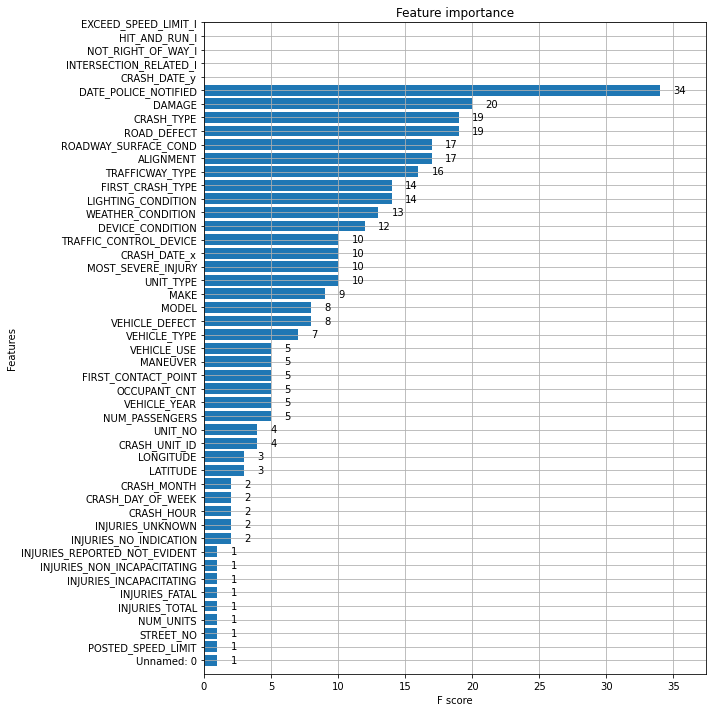

In [11]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# Load the feature names from the CSV file
feature_names_df = pd.read_csv('data/feature_names.csv')
feature_names = feature_names_df['Feature Name'].tolist()

fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.set_yticks(range(len(feature_names)))  # Set tick locations
ax.set_yticklabels(feature_names)  # Set tick labels
plt.tight_layout()  # Adjust spacing
plt.show()


In [8]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter combination and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Best Accuracy:", accuracy)


KeyboardInterrupt: 